# Rolling statistics

https://youtu.be/FRzfD1FtrsQ?list=PLQVvvaa0QuDc-3szzjeP6N6b0aDrrKyL-

In [1]:
import quandl;
import pandas as pd;

import pickle;

import matplotlib.pyplot as plt;
from matplotlib import style;
style.use("ggplot");

In [2]:
api_key = open("quandlapikey.txt", "r").read();

def state_list():
    fiddy_states = pd.read_html("https://simple.wikipedia.org/wiki/List_of_U.S._states");
    return fiddy_states[0][0][1:];

def grap_initial_state_data_start_pct():
    states = state_list();
    main_df = pd.DataFrame();
    for ab in states:
        querry = "FMAC/HPI_" + ab;
        df = quandl.get(querry, authtoken = api_key);
        df.columns = [ab];        
        df[ab] = (df[ab] - df[ab][0]) / df[ab][0] * 100.0; # <-------
        if main_df.empty:
            main_df = df;
        else:
            main_df = main_df.join(df);

    pickle_out = open("./data/fiddy_states.pickle", "wb");
    pickle.dump(main_df, pickle_out);
    pickle_out.close();
    
def HPI_Benchmark():
    df = quandl.get("FMAC/HPI_USA", authtoken = api_key);
    df.columns = ["US"];        
    df["US"] = (df["US"] - df["US"][0]) / df["US"][0] * 100.0; # <-------
    return df;

4.00183593433
4.52699828329
5.04935449285
                    TX      TX12MA    TX12STD
Date                                         
1975-01-31    0.000000         NaN        NaN
1975-02-28    0.951488         NaN        NaN
1975-03-31    2.701039         NaN        NaN
1975-04-30    5.276570         NaN        NaN
1975-05-31    6.099286         NaN        NaN
1975-06-30    4.882747         NaN        NaN
1975-07-31    4.067261         NaN        NaN
1975-08-31    4.011509         NaN        NaN
1975-09-30    4.272719         NaN        NaN
1975-10-31    4.606024         NaN        NaN
1975-11-30    5.261535         NaN        NaN
1975-12-31    5.891854    4.001836   1.892892
1976-01-31    6.301948    4.526998   1.518962
1976-02-29    7.219763    5.049354   1.227420
1976-03-31    9.422551    5.609480   1.549707
1976-04-30   12.572041    6.217436   2.528899
1976-05-31   13.553547    6.838625   3.296316
1976-06-30   12.362672    7.461952   3.587223
1976-07-31   11.779576    8.104645   3

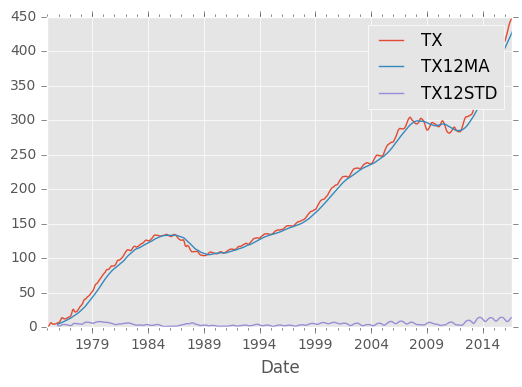

In [17]:
#grap_initial_state_data_start_pct(); 
HPI_data = pd.read_pickle("./data/fiddy_states.pickle");

for shift in range(0, 3): # <------- mean values
    avg = 0.;
    for i in range(shift, shift + 12):
        avg += HPI_data["TX"][i];
    avg /= 12.;
    print(avg);
    
HPI_data["TX12MA"] = HPI_data["TX"].rolling(window = 12).mean();
HPI_data["TX12STD"] = HPI_data["TX"].rolling(window = 12).std(); # like root-mean-square deviation from expected value
print(HPI_data[["TX", "TX12MA", "TX12STD"]]);

HPI_data[["TX", "TX12MA", "TX12STD"]].plot();
plt.legend();
plt.show();

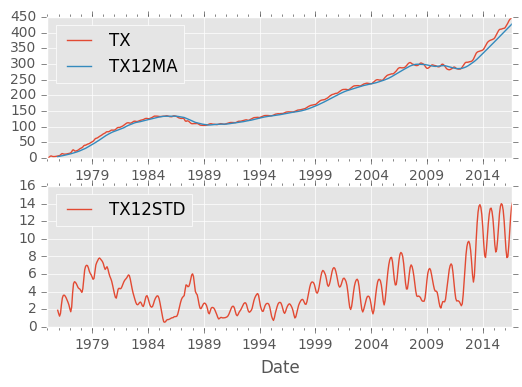

In [22]:
fig = plt.figure();
ax1 = plt.subplot2grid((2, 1), (0, 0)); # ((height-graps, width-graps), (height-start, width-start));
ax2 = plt.subplot2grid((2, 1), (1, 0));

HPI_data = pd.read_pickle("./data/fiddy_states.pickle");

    
HPI_data["TX12MA"] = HPI_data["TX"].rolling(window = 12).mean();
HPI_data["TX12STD"] = HPI_data["TX"].rolling(window = 12).std(); # like root-mean-square deviation from expected value
HPI_data[["TX", "TX12MA"]].plot(ax = ax1);
HPI_data["TX12STD"].plot(ax = ax2)

plt.legend(loc = 2);
plt.show();

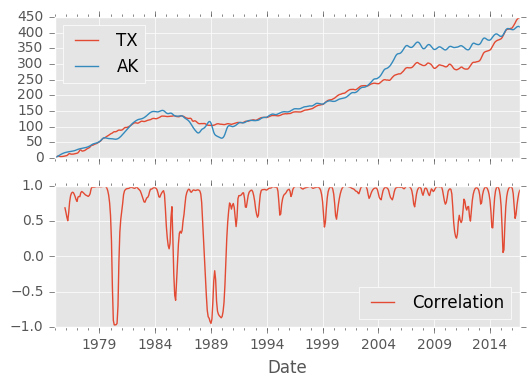

In [30]:
HPI_data = pd.read_pickle("./data/fiddy_states.pickle");

fig = plt.figure();
ax1 = plt.subplot2grid((2, 1), (0, 0));
ax2 = plt.subplot2grid((2, 1), (1, 0), sharex = ax1);

TX_AK_12_corr = HPI_data["TX"].rolling(window = 12).corr(HPI_data["AK"]);
HPI_data[["TX", "AK"]].plot(ax = ax1);
TX_AK_12_corr.plot(ax = ax2, label = "Correlation");
plt.legend(loc = 4);
plt.show();